In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the uploaded dataset
df = pd.read_csv('mobil.csv')

df

,Mobil,Jarak,Bahan_Bakar
0,ACURA,10,1.5
1,AUDI,20,2.2
2,ASTON MARTIN,27,2.8
3,BMW,43,3.6
4,BENTLEY,50,4.5
5,CHEVROLET,55,4.9
6,FIAT,70,5.6
7,FORD,80,6.2
8,HONDA,89,6.8
9,HYUNDAI,100,7.5


In [3]:
# Step 1: Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mobil        20 non-null     object 
 1   Jarak        20 non-null     int64  
 2   Bahan_Bakar  20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 612.0+ bytes


In [4]:
# Menggunakan kolom 'Nama' sebagai index
data = df.set_index('Mobil')

In [5]:
# Rename columns for easier access
# data.columns = ['Kalori_per_hari', 'berat_badan'] 

In [6]:
# Check for any missing values in the dataset
df.isnull().sum()

Mobil          0
Jarak          0
Bahan_Bakar    0
dtype: int64

In [7]:
# Step 2: Split the data into training and testing sets
X = data[['Jarak']]
y = data['Bahan_Bakar']

# Using a 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [8]:
# Step 3: Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)


In [10]:
# Step 5: Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display model coefficients and evaluation metrics
a = model.intercept_  # Intercept
b = model.coef_[0]    # Slope

# Display the calculated metrics and model coefficients
print("{:.2f}".format(a))
print("{:.2f}".format(b))
print("{:.2f}".format(mae))
print("{:.2f}".format(mse))
print("{:.2f}".format(rmse))
print("{:.2f}".format(r_squared))
print("{:.2f}".format(mape))

1.04
0.06
0.39
0.25
0.50
0.99
3.79


In [11]:
print("hasil intercept adalah", "{:.2f}".format(a))
print("setiap peningkatan asupan kalori harian sebesar 1 satuan diasumsikan meningkatkan berat badan sekitar", "{:.3f}".format(b), "kg")
print("Rata-rata kesalahan absolut dalam prediksi berat badan adalah sekitar", "{:.2f}".format(mae), "kg")
print("Kuadrat rata-rata kesalahan adalah", "{:.2f}".format(mse))
print("Kesalahan dalam satuan yang sama dengan data asli", "{:.2f}".format(rmse), 'kg')
print("Nilai negatif menunjukkan bahwa model tidak cocok dengan data (fit yang buruk), mungkin karena outliers atau ukuran dataset yang kecil", "{:.2f}".format(r_squared))
print("Kesalahan rata-rata dalam bentuk persentase, yang tergolong akurat secara umum sekitar", "{:.2f}".format(mape)+'%')


hasil intercept adalah 1.04
setiap peningkatan asupan kalori harian sebesar 1 satuan diasumsikan meningkatkan berat badan sekitar 0.064 kg
Rata-rata kesalahan absolut dalam prediksi berat badan adalah sekitar 0.39 kg
Kuadrat rata-rata kesalahan adalah 0.25
Kesalahan dalam satuan yang sama dengan data asli 0.50 kg
Nilai negatif menunjukkan bahwa model tidak cocok dengan data (fit yang buruk), mungkin karena outliers atau ukuran dataset yang kecil 0.99
Kesalahan rata-rata dalam bentuk persentase, yang tergolong akurat secara umum sekitar 3.79%


d:\Materi Ajar\Machine Learning Tutorial\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


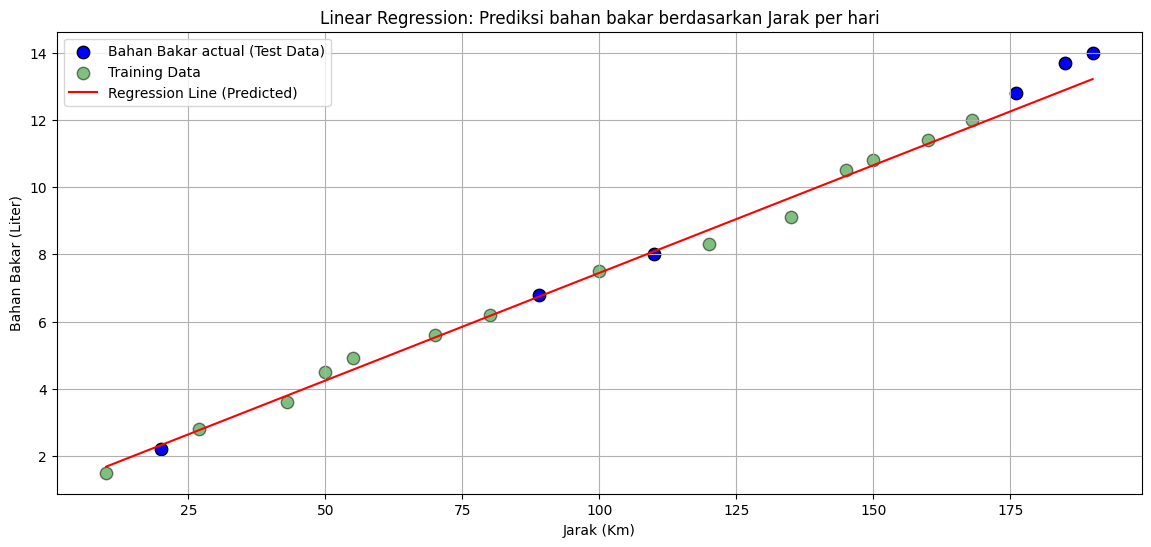

In [12]:
# Visualize the original data and the linear regression results

# Scatter plot of the original data points
plt.figure(figsize=(14, 6))
plt.scatter(X_test, y_test, color='blue', label="Bahan Bakar actual (Test Data)", s=80, edgecolor='k')
plt.scatter(X_train, y_train, color='green', label="Training Data", alpha=0.5, s=80, edgecolor='k')

# Plotting the regression line based on the model
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Generating X values for a smooth line
y_line = model.predict(X_line)  # Predicted Y values based on the regression line
plt.plot(X_line, y_line, color='red', label="Regression Line (Predicted)")

# Adding labels, title, and legend
plt.xlabel("Jarak (Km)")
plt.ylabel("Bahan Bakar (Liter)")
plt.title("Linear Regression: Prediksi bahan bakar berdasarkan Jarak per hari")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 1. Judul Grafik:
# "Linear Regression: Prediksi bahan bakar berdasarkan Jarak per hari": Judul ini menunjukkan bahwa grafik ini menggunakan model regresi linier untuk memprediksi jumlah bahan bakar berdasarkan jarak.
# 2. Sumbu X (Jarak dalam Km):
# Jarak (Km): Sumbu X mewakili jarak yang ditempuh dalam satuan kilometer. Nilai pada sumbu ini mencakup rentang jarak dari sekitar 20 km hingga 180 km.
# 3. Sumbu Y (Bahan Bakar dalam Liter):
# Bahan Bakar (liter): Sumbu Y mewakili konsumsi bahan bakar dalam liter. Grafik ini menunjukkan hubungan antara jarak yang ditempuh dan jumlah bahan bakar yang digunakan. Nilai pada sumbu Y menunjukkan peningkatan konsumsi bahan bakar seiring bertambahnya jarak.
# 4. Titik Data:
# Training Data (Titik Hijau): Titik-titik hijau menggambarkan data pelatihan yang digunakan untuk melatih model regresi linier. Titik ini adalah pasangan data antara jarak yang ditempuh dan konsumsi bahan bakar yang sesuai. Titik-titik hijau digunakan oleh model untuk belajar dan menentukan hubungan antara dua variabel tersebut.

# Test Data (Titik Biru): Titik biru mewakili test data atau data yang tidak digunakan dalam pelatihan, tetapi digunakan untuk menguji akurasi model. Dalam hal ini, titik biru mewakili jarak dan konsumsi bahan bakar yang sebenarnya pada data uji. Hasil prediksi dari model diharapkan untuk berada di dekat titik-titik biru.

# 5. Garis Regresi (Red Line):
# Garis Regresi: Garis merah menunjukkan hasil regresi linier yang diprediksi berdasarkan data pelatihan. Garis ini mencoba untuk memodelkan hubungan linier antara jarak dan konsumsi bahan bakar.
# Prediksi: Garis ini memperlihatkan bagaimana model memprediksi konsumsi bahan bakar untuk jarak yang diberikan. Prediksi model ini menunjukkan pola naik yang konsisten, yang artinya semakin jauh jarak yang ditempuh, semakin banyak bahan bakar yang digunakan.
# 6. Interpretasi Hasil:
# Hubungan Linier: Grafik ini menunjukkan bahwa hubungan antara jarak yang ditempuh dan bahan bakar yang digunakan adalah linier, yang berarti semakin jauh jarak, semakin banyak bahan bakar yang dibutuhkan.
# Kesesuaian Model: Model regresi linier ini seharusnya memberikan hasil yang cukup baik jika garis prediksi (garis merah) cukup mendekati titik-titik biru (data uji). Jika garis prediksi sangat mendekati titik data, maka model tersebut dipertimbangkan akurasi tinggi.
# 7. Kesimpulan:
# Model regresi linier ini digunakan untuk memprediksi konsumsi bahan bakar berdasarkan jarak. Dengan menggunakan model ini, kita bisa memperkirakan jumlah bahan bakar yang dibutuhkan untuk perjalanan dengan jarak tertentu.
# Jika model cukup baik, prediksi bahan bakar untuk jarak uji yang lebih jauh seharusnya sesuai dengan pola data yang ada.